In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
pixscale = 0.262
# pixscale = 0.454
psfex_dir = '/global/cfs/cdirs/cosmo/work/legacysurvey/dr9k/calib/psfex'

# surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-decam-dr9.fits.gz'
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-mosaic-dr9.fits.gz'
# surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-90prime-dr9.fits.gz'
# image_path_list = glob.glob(os.path.join(image_dir, '*ooi*.fits.fz'))
ccd = Table(fitsio.read(surveyccd_path, columns=['filter', 'expnum', 'image_filename', 'ccd_cuts', 'fwhm', 'image_hdu']))

In [4]:
mask = ccd['ccd_cuts']==0
ccd = ccd[mask]
_, idx = np.unique(ccd['expnum'], return_index=True)
ccd = ccd[idx]
print(len(ccd))

52243


In [5]:
ccd[:1]

image_filename,image_hdu,expnum,filter,fwhm,ccd_cuts
bytes120,int16,int64,bytes1,float32,int64
mosaic/CP/V4.3/CP20151213/k4m_151214_022753_ooi_zd_ls9.fits.fz,1,62789,z,3.73,0


In [6]:
# np.random.seed(681)
# ccd_index_list = np.random.choice(len(ccd), size=10000, replace=False)

# frac_list = []
# for ccd_index in ccd_index_list:
#     image_filename = ccd['image_filename'][ccd_index]
#     psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
#     psfex_path = os.path.join(psfex_dir, psfex_filename)
#     data = Table(fitsio.read(psfex_path, ext=1))

#     psf = np.array(data['psf_mask'][0, 0])

#     grid = pixscale * np.linspace(-0.5*(psf.shape[0]-1), 0.5*(psf.shape[0]-1), psf.shape[0])
#     xx, yy = np.meshgrid(grid, grid)
#     radius_grid = np.sqrt(xx**2 + yy**2)

#     mask = radius_grid>3.0
#     frac_list.append(np.sum(np.sum(psf[mask])/np.sum(psf)))
# frac_list = np.array(frac_list)

In [98]:
frac_list = np.zeros(len(ccd))
fwhm_list = np.zeros(len(ccd))
for ccd_index in range(len(ccd)):
    if ccd_index%1000==0:
        print(ccd_index, len(ccd))
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])

    grid = pixscale * np.linspace(-0.5*(psf.shape[0]-1), 0.5*(psf.shape[0]-1), psf.shape[0])
    xx, yy = np.meshgrid(grid, grid)
    radius_grid = np.sqrt(xx**2 + yy**2)

    mask = radius_grid>3.0
    frac_list[ccd_index] = np.sum(np.sum(psf[mask])/np.sum(psf))
    fwhm_list[ccd_index] = data['psf_fwhm'][0]

0 52243
1000 52243
2000 52243
3000 52243
4000 52243
5000 52243
6000 52243
7000 52243
8000 52243
9000 52243
10000 52243
11000 52243
12000 52243
13000 52243
14000 52243
15000 52243
16000 52243
17000 52243
18000 52243
19000 52243
20000 52243
21000 52243
22000 52243
23000 52243
24000 52243
25000 52243
26000 52243
27000 52243
28000 52243
29000 52243
30000 52243
31000 52243
32000 52243
33000 52243
34000 52243
35000 52243
36000 52243
37000 52243
38000 52243
39000 52243
40000 52243
41000 52243
42000 52243
43000 52243
44000 52243
45000 52243
46000 52243
47000 52243
48000 52243
49000 52243
50000 52243
51000 52243
52000 52243


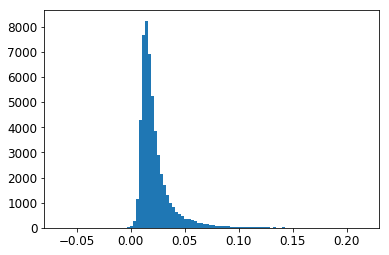

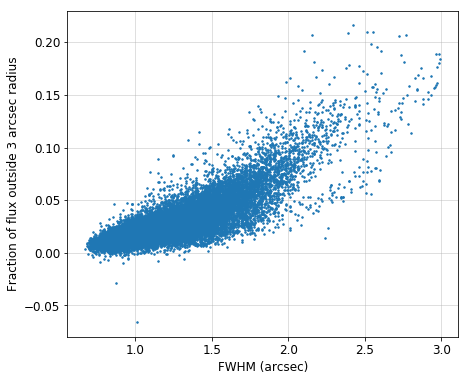

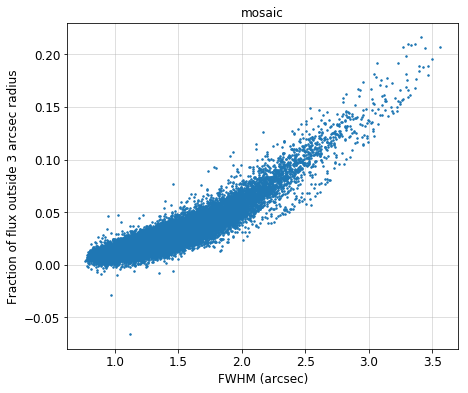

In [103]:
plt.hist(frac_list, 100)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(ccd['fwhm']*pixscale, frac_list, '.', ms=3.)
plt.xlabel('FWHM (arcsec)')
plt.ylabel('Fraction of flux outside 3 arcsec radius')
plt.grid(alpha=0.5)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(fwhm_list*pixscale, frac_list, '.', ms=3.)
plt.xlabel('FWHM (arcsec)')
plt.ylabel('Fraction of flux outside 3 arcsec radius')
plt.title('mosaic')
plt.grid(alpha=0.5)
plt.show()

In [7]:
# np.save('psfex/mosaic_3_arcsec_frac.npy', frac_list)
# np.save('psfex/mosaic_3_fwhm.npy', fwhm_list)

In [121]:
# mask = frac_list>0.13
# print(np.sum(mask))
# for ccd_index in np.arange(len(ccd))[mask]:
#     print(ccd_index)
#     image_filename = ccd['image_filename'][ccd_index]
#     psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
#     psfex_path = os.path.join(psfex_dir, psfex_filename)
#     data = Table(fitsio.read(psfex_path, ext=1))

#     psf = np.array(data['psf_mask'][0, 0])
#     psf_vrange = 0.001

#     extent = 0.5*pixscale*(psf.shape[1]*np.array([-1, 1, 0, 0])+psf.shape[0]*np.array([0, 0, -1, 1]))
#     plt.imshow(psf, vmin=-psf_vrange, vmax=psf_vrange, cmap='seismic', extent=extent)
#     plt.grid(alpha=0.5)
#     plt.xlabel('arcsec')
#     plt.ylabel('arcsec')
#     plt.show()

132
51987


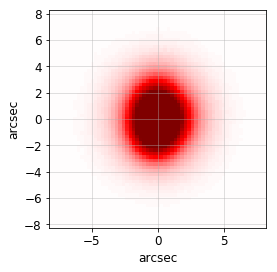

In [124]:
mask = frac_list>0.13
print(np.sum(mask))
for ccd_index in np.arange(len(ccd))[mask][-2:-1]:
    print(ccd_index)
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])
    psf_vrange = 0.002

    extent = 0.5*pixscale*(psf.shape[1]*np.array([-1, 1, 0, 0])+psf.shape[0]*np.array([0, 0, -1, 1]))
    plt.imshow(psf, vmin=-psf_vrange, vmax=psf_vrange, cmap='seismic', extent=extent)
    plt.grid(alpha=0.5)
    plt.xlabel('arcsec')
    plt.ylabel('arcsec')
    plt.show()

In [125]:
# mask = frac_list<-0.02
# print(np.sum(mask))
# for ccd_index in np.arange(len(ccd))[mask]:
#     print(ccd_index)
#     image_filename = ccd['image_filename'][ccd_index]
#     psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
#     psfex_path = os.path.join(psfex_dir, psfex_filename)
#     data = Table(fitsio.read(psfex_path, ext=1))

#     psf = np.array(data['psf_mask'][0, 0])
#     psf_vrange = 0.001

#     extent = 0.5*pixscale*(psf.shape[1]*np.array([-1, 1, 0, 0])+psf.shape[0]*np.array([0, 0, -1, 1]))
#     plt.imshow(psf, vmin=-psf_vrange, vmax=psf_vrange, cmap='seismic', extent=extent)
#     plt.grid(alpha=0.5)
#     plt.xlabel('arcsec')
#     plt.ylabel('arcsec')
#     plt.show()

---------
## Check asymmetry

In [8]:
def binned_std(x, y, bins):
    bin_center, bin_std = np.zeros((2, len(bins)-1))
    for index in range(len(bins)-1):
        mask = (x>bins[index]) & (x<bins[index+1])
        bin_center[index] = np.mean(x[mask])
        if np.sum(mask)>0:
            bin_std[index] = np.std(y[mask])
        else:
            bin_std[index] = np.nan
    return bin_center, bin_std

def binned_mean(x, y, bins):
    bin_center, bin_mean = np.zeros((2, len(bins)-1))
    for index in range(len(bins)-1):
        mask = (x>bins[index]) & (x<bins[index+1])
        bin_center[index] = np.mean(x[mask])
        if np.sum(mask)>0:
            bin_mean[index] = np.mean(y[mask])
        else:
            bin_mean[index] = np.nan
    return bin_center, bin_mean

In [9]:
from scipy.optimize import curve_fit

def get_frac_moffat(r, alpha, beta):
    """
    Calculate the fraction of light within radius r of a Moffat profile.
    """    
    frac = 1 - alpha**(2*(beta-1))*(alpha**2 + r**2)**(1-beta)
    return(frac)

def get_sb_moffat(r, alpha, beta):
    """
    Calculate the surface brightness of light at radius r of a Moffat profile.
    The integral (i.e., total flux) is unity by definition.
    """
    i = (beta-1)/(np.pi * alpha**2)*(1 + (r/alpha)**2)**(-beta)
    return i

def get_sb_moffat_plus_power_law(r, alpha1, beta1, plexp2, weight2):
    """
    Calculate the surface brightness of light at radius r of the sum of two Moffat profiles.
    The integral (i.e., total flux) is NOT unity.
    """
    i = (beta1-1)/(np.pi * alpha1**2)*(1 + (r/alpha1)**2)**(-beta1) \
        + weight2 *r**(plexp2)
    return i

def get_sb_double_moffat(r, alpha1, beta1, alpha2, beta2, weight2):
    """
    Calculate the surface brightness of light at radius r of the sum of two Moffat profiles.
    The integral (i.e., total flux) is NOT unity.
    """
    i = (beta1-1)/(np.pi * alpha1**2)*(1 + (r/alpha1)**2)**(-beta1) \
        + weight2 * (beta2-1)/(np.pi * alpha2**2)*(1 + (r/alpha2)**2)**(-beta2)
    return i

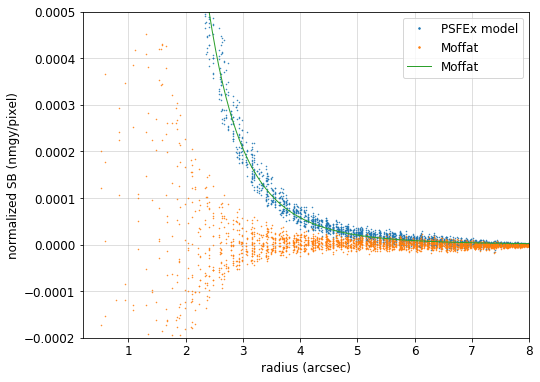

In [29]:
bin_mean_list = []
bin_std_list = []

np.random.seed(681)
ccd_index_list = np.random.choice(len(ccd), size=1, replace=False)

for ccd_index in ccd_index_list:
    
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])

    grid = pixscale * np.linspace(-0.5*(psf.shape[0]-1), 0.5*(psf.shape[0]-1), psf.shape[0])
    xx, yy = np.meshgrid(grid, grid)
    radius_grid = np.sqrt(xx**2 + yy**2)
    radius = radius_grid.flatten()
    psf = psf/np.sum(psf)

    ################# Moffat fit ##############

    radius_min, radius_max = 1.8, 5.0

    psf_flat = psf.flatten()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # popt, pcov =  curve_fit(get_sb_moffat, radius, psf_flat/(pixscale**2))
        mask = (radius>radius_min) & (radius<radius_max)
        popt, pcov = curve_fit(get_sb_moffat, radius[mask], psf_flat[mask]/(pixscale**2), bounds=((0, 1.8), np.inf))

    alpha, beta = popt
    # print('alpha, beta = {:.3f}, {:.3f}'.format(alpha, beta))

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        radius_plot = np.linspace(0, 30, 500)
        psf_predict = pixscale**2 * get_sb_moffat(radius_grid, alpha, beta)
        psf_plot = pixscale**2 * get_sb_moffat(radius_plot, alpha, beta)

        bins = np.arange(1, 8, 0.3)
        bin_center, bin_mean = binned_mean(radius, 1000*(psf_flat-psf_predict.flatten()), bins=bins)
        bin_center, bin_std = binned_std(radius, 1000*(psf_flat-psf_predict.flatten()), bins=bins)
        
        bin_mean_list.append(bin_mean)
        bin_std_list.append(bin_std)
        
    plt.figure(figsize=(8, 6))
    plt.plot(radius, psf_flat, '.', ms=1., label='PSFEx model')
    plt.plot(radius, psf_flat-psf_predict.flatten(), '.', ms=1, label='Moffat')
    plt.plot(radius_plot, psf_plot, '-', lw=1, label='Moffat')
    mask = radius_plot>0.5
    # plt.loglog(radius_plot[mask], 10**(profile_fit(np.log10(radius_plot)))[mask], 'C2--', lw=1.2, label='polynomial')
    plt.axis([0.2, 8, -0.0002, 0.0005])
    plt.grid(alpha=0.5)
    plt.xlabel('radius (arcsec)')
    plt.ylabel('normalized SB (nmgy/pixel)')
    plt.legend(markerscale=3)
    plt.show()

In [27]:
bin_mean_list = []
bin_std_list = []

np.random.seed(681)
ccd_index_list = np.random.choice(len(ccd), size=100, replace=False)

for ccd_index in ccd_index_list:
    
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])

    grid = pixscale * np.linspace(-0.5*(psf.shape[0]-1), 0.5*(psf.shape[0]-1), psf.shape[0])
    xx, yy = np.meshgrid(grid, grid)
    radius_grid = np.sqrt(xx**2 + yy**2)
    radius = radius_grid.flatten()
    psf = psf/np.sum(psf)

    ################# Moffat fit ##############

    radius_min, radius_max = 1.8, 5.0

    psf_flat = psf.flatten()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # popt, pcov =  curve_fit(get_sb_moffat, radius, psf_flat/(pixscale**2))
        mask = (radius>radius_min) & (radius<radius_max)
        popt, pcov = curve_fit(get_sb_moffat, radius[mask], psf_flat[mask]/(pixscale**2), bounds=((0, 1.8), np.inf))

    alpha, beta = popt
    # print('alpha, beta = {:.3f}, {:.3f}'.format(alpha, beta))

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        psf_predict = pixscale**2 * get_sb_moffat(radius_grid, alpha, beta)

        bins = np.arange(2, 8, 0.5)
        bin_center, bin_mean = binned_mean(radius, 1000*(psf_flat-psf_predict.flatten()), bins=bins)
        bin_center, bin_std = binned_std(radius, 1000*(psf_flat-psf_predict.flatten()), bins=bins)
        
        bin_mean_list.append(bin_mean)
        bin_std_list.append(bin_std)

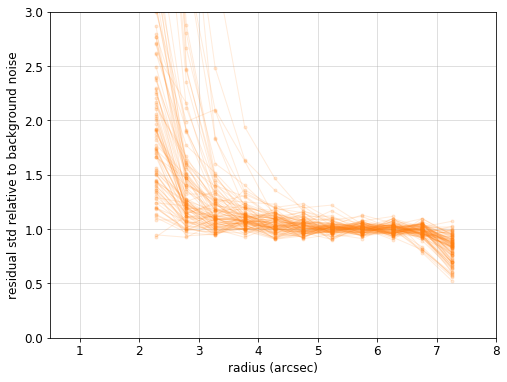

In [28]:
plt.figure(figsize=(8, 6))
for bin_mean, bin_std in zip(bin_mean_list, bin_std_list):
    mask = (bin_center>5) & (bin_center<7)
    bin_std_mean = np.mean(bin_std[mask])
    plt.plot(bin_center, bin_std/bin_std_mean, '.-', lw=1, alpha=0.15, color='C1')
plt.axhline(0, color='k', lw=0.5)
plt.axis([0.5, 8, 0, 3])
plt.grid(alpha=0.5)
plt.xlabel('radius (arcsec)')
plt.ylabel('residual std relative to background noise')
plt.show()

In [ ]:
np.random.seed(681)
# ccd_index_list = np.random.choice(len(ccd), size=1000, replace=False)
ccd_index_list = np.arange(len(ccd))

r_moment_list = np.zeros(len(ccd_index_list))

for index, ccd_index in enumerate(ccd_index_list):
    
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])

    grid = pixscale * np.linspace(-0.5*(psf.shape[0]-1), 0.5*(psf.shape[0]-1), psf.shape[0])
    xx, yy = np.meshgrid(grid, grid)
    radius_grid = np.sqrt(xx**2 + yy**2)
    radius = radius_grid.flatten()
    psf = psf/np.sum(psf)
    
    x_moment = np.sum(xx*psf)
    y_moment = np.sum(yy*psf)
    r_moment_list[index] = np.sqrt(x_moment**2 + y_moment**2)

In [ ]:
plt.hist(r_moment_list, 100)
plt.show()

In [ ]:
mask = r_moment_list>0.1
print(np.sum(mask))
for ccd_index in ccd_index_list[mask]:
    print(ccd_index)
    image_filename = ccd['image_filename'][ccd_index]
    psfex_filename = image_filename.replace('.fits.fz', '-psfex.fits')
    psfex_path = os.path.join(psfex_dir, psfex_filename)
    data = Table(fitsio.read(psfex_path, ext=1))

    psf = np.array(data['psf_mask'][0, 0])
    psf_vrange = 0.001

    extent = 0.5*pixscale*(psf.shape[1]*np.array([-1, 1, 0, 0])+psf.shape[0]*np.array([0, 0, -1, 1]))
    plt.imshow(psf, vmin=-psf_vrange, vmax=psf_vrange, cmap='seismic', extent=extent)
    plt.grid(alpha=0.5)
    plt.xlabel('arcsec')
    plt.ylabel('arcsec')
    plt.show()